In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Question1

a) SVM algorithm with linear

In [ ]:

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]
        
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=50, c="g")

        # w.x + b = 0
        tmp1 = 3
        tmp2 = 7
        a0 = tmp1; a1 = f(a0, clf.w, clf.b)
        b0 = tmp2; b1 = f(b0, clf.w, clf.b)
        pl.plot([a0,b0], [a1,b1], "k")

        # w.x + b = 1
        a0 = tmp1; a1 = f(a0, clf.w, clf.b, 1)
        b0 = tmp2; b1 = f(b0, clf.w, clf.b, 1)
        pl.plot([a0,b0], [a1,b1], "k--")

        # w.x + b = -1
        a0 = tmp1; a1 = f(a0, clf.w, clf.b, -1)
        b0 = tmp2; b1 = f(b0, clf.w, clf.b, -1)
        pl.plot([a0,b0], [a1,b1], "k--")

        pl.axis("tight")
        pl.figure(1)
        pl.show()

b) SVM with RBF kernel

In [ ]:

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))


class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

 def plot_contour(X1_train, X2_train, clf):
         pl.plot(X1_train[:,0], X1_train[:,1], "ro")
         pl.plot(X2_train[:,0], X2_train[:,1], "bo")
         pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

         X1, X2 = np.meshgrid(np.linspace(-3,7,50), np.linspace(-3,7,50))
         X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
         Z = clf.project(X).reshape(X1.shape)
         pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
         pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
         pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

         pl.axis("tight")
         pl.show()

#Question 2

     pcost       dcost       gap    pres   dres
 0: -1.3931e+01 -3.0684e+01  3e+02  1e+01  2e+00
 1: -2.2700e+01 -2.8434e+01  9e+01  5e+00  7e-01
 2: -3.1206e+01 -3.4326e+01  7e+01  3e+00  4e-01
 3: -2.9320e+01 -3.0296e+01  3e+01  1e+00  2e-01
 4: -2.5181e+01 -2.5357e+01  2e+00  8e-02  1e-02
 5: -2.5002e+01 -2.5004e+01  2e-02  8e-04  1e-04
 6: -2.5000e+01 -2.5000e+01  2e-04  8e-06  1e-06
 7: -2.5000e+01 -2.5000e+01  2e-06  8e-08  1e-08
Optimal solution found.
5 support vectors out of 80 points
20 out of 20 predictions correct


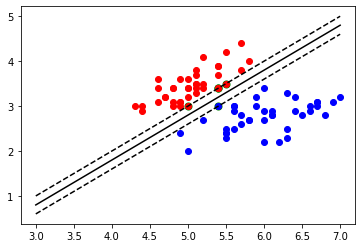

     pcost       dcost       gap    pres   dres
 0: -8.6131e+00 -2.5907e+01  2e+02  1e+01  2e+00
 1: -5.4039e+00 -2.5288e+01  3e+01  8e-01  1e-01
 2: -9.7390e+00 -2.0455e+01  1e+01  1e-01  2e-02
 3: -1.3318e+01 -2.0957e+01  8e+00  3e-02  5e-03
 4: -1.6152e+01 -1.8132e+01  2e+00  8e-03  1e-03
 5: -1.6815e+01 -1.7682e+01  9e-01  3e-15  4e-15
 6: -1.7507e+01 -1.7529e+01  2e-02  4e-15  5e-15
 7: -1.7526e+01 -1.7526e+01  2e-04  6e-15  6e-15
 8: -1.7526e+01 -1.7526e+01  2e-06  6e-15  5e-15
Optimal solution found.
3 support vectors out of 80 points
20 out of 20 predictions correct


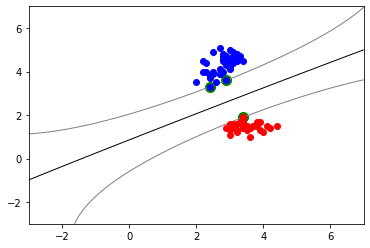

In [ ]:


import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
from sklearn.datasets import load_iris

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl

    def gen_lin_separable_data():
        iris = load_iris()
        X = iris.data[:, 0:2]  
        y = iris.target
        X1 = X[:50]
        X2 = X[50:100]
        y1 = np.ones(len(X1))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2
    
    def gen_non_lin_separable_data():
        iris = load_iris()
        X = iris.data[:, 1:3]  
        y = iris.target
        X1 = X[:50]
        X2 = X[50:100]
        y1 = np.ones(len(X1))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2


    def split_train(X1, y1, X2, y2):
        X1_train = X1[:40]
        y1_train = y1[:40]
        X2_train = X2[:40]
        y2_train = y2[:40]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train

    def split_test(X1, y1, X2, y2):
        X1_test = X1[40:]
        y1_test = y1[40:]
        X2_test = X2[40:]
        y2_test = y2[40:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test

    def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]
        
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=50, c="g")

        # w.x + b = 0
        tmp1 = 3
        tmp2 = 7
        a0 = tmp1; a1 = f(a0, clf.w, clf.b)
        b0 = tmp2; b1 = f(b0, clf.w, clf.b)
        pl.plot([a0,b0], [a1,b1], "k")

        # w.x + b = 1
        a0 = tmp1; a1 = f(a0, clf.w, clf.b, 1)
        b0 = tmp2; b1 = f(b0, clf.w, clf.b, 1)
        pl.plot([a0,b0], [a1,b1], "k--")

        # w.x + b = -1
        a0 = tmp1; a1 = f(a0, clf.w, clf.b, -1)
        b0 = tmp2; b1 = f(b0, clf.w, clf.b, -1)
        pl.plot([a0,b0], [a1,b1], "k--")

        pl.axis("tight")
        pl.figure(1)
        pl.show()
        
    def plot_contour(X1_train, X2_train, clf):
         pl.plot(X1_train[:,0], X1_train[:,1], "ro")
         pl.plot(X2_train[:,0], X2_train[:,1], "bo")
         pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

         X1, X2 = np.meshgrid(np.linspace(-3,7,50), np.linspace(-3,7,50))
         X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
         Z = clf.project(X).reshape(X1.shape)
         pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
         pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
         pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

         pl.axis("tight")
         pl.show()

    def test_linear():
        
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM()
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_margin(X_train[y_train==1], X_train[y_train==-1], clf)
        
    def test_non_linear():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(gaussian_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)


        
    test_linear()
    test_non_linear()


#Question 3

In [ ]:


import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
from sklearn.datasets import load_iris

def linear_kernel(x1, x2):
    return np.dot(x1, x2)


class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl

    def gen_lin_separable_data():
        iris = load_iris()
        X = iris.data[:,:]  
        y = iris.target
        X1 = X[:50]
        X2 = X[50:100]
        y1 = np.ones(len(X1))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2


    def split_train(X1, y1, X2, y2):
        X1_train = X1[:40]
        y1_train = y1[:40]
        X2_train = X2[:40]
        y2_train = y2[:40]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train

    def split_test(X1, y1, X2, y2):
        X1_test = X1[40:]
        y1_test = y1[40:]
        X2_test = X2[40:]
        y2_test = y2[40:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test

    def test_linear():
        
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM()
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))
    test_linear()

     pcost       dcost       gap    pres   dres
 0: -3.0005e+00 -5.0359e+00  2e+02  1e+01  1e+00
 1: -7.8313e-01 -1.6331e+00  1e+01  1e+00  1e-01
 2: -1.4443e-01 -1.1042e+00  1e+00  1e-02  2e-03
 3: -3.7899e-01 -5.8208e-01  2e-01  2e-03  2e-04
 4: -4.7784e-01 -6.1519e-01  1e-01  6e-04  7e-05
 5: -5.4847e-01 -5.6303e-01  1e-02  5e-05  6e-06
 6: -5.5924e-01 -5.5952e-01  3e-04  5e-07  6e-08
 7: -5.5947e-01 -5.5947e-01  3e-06  5e-09  6e-10
 8: -5.5947e-01 -5.5947e-01  3e-08  5e-11  6e-12
Optimal solution found.
3 support vectors out of 80 points
20 out of 20 predictions correct


#Question 4

In [ ]:


import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
from sklearn.datasets import load_iris

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl

    
    def gen_non_lin_separable_data():
        iris = load_iris()
        X = iris.data[:, 0:4]  
        y = iris.target
        X1 = X[:50]
        X2 = X[50:100]
        y1 = np.ones(len(X1))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2


    def split_train(X1, y1, X2, y2):
        X1_train = X1[:40]
        y1_train = y1[:40]
        X2_train = X2[:40]
        y2_train = y2[:40]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train

    def split_test(X1, y1, X2, y2):
        X1_test = X1[40:]
        y1_test = y1[40:]
        X2_test = X2[40:]
        y2_test = y2[40:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test

        
        
    def test_non_linear():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(gaussian_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))


        
    # test_linear()
    test_non_linear()

     pcost       dcost       gap    pres   dres
 0: -7.6845e+00 -2.3518e+01  2e+02  1e+01  2e+00
 1: -5.1571e+00 -2.4215e+01  3e+01  2e+00  2e-01
 2: -8.0545e+00 -1.8152e+01  1e+01  6e-02  1e-02
 3: -1.1407e+01 -1.5048e+01  4e+00  1e-02  2e-03
 4: -1.3911e+01 -1.4635e+01  7e-01  4e-15  3e-15
 5: -1.4490e+01 -1.4510e+01  2e-02  3e-15  3e-15
 6: -1.4508e+01 -1.4508e+01  2e-04  2e-15  3e-15
 7: -1.4508e+01 -1.4508e+01  2e-06  4e-15  3e-15
Optimal solution found.
3 support vectors out of 80 points
20 out of 20 predictions correct


#Question 5

In [ ]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
rbf_pred = rbf.predict(X_test)

rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

#Question 6

     pcost       dcost       gap    pres   dres
 0: -4.1547e+00 -7.1482e+00  2e+02  1e+01  2e+00
 1: -9.8005e-01 -1.8448e+00  2e+01  1e+00  2e-01
 2:  3.0468e-02 -1.3754e+00  1e+00  4e-16  1e-15
 3: -3.5214e-01 -6.7488e-01  3e-01  4e-17  5e-16
 4: -4.3934e-01 -7.0432e-01  3e-01  9e-17  5e-16
 5: -5.8892e-01 -6.4984e-01  6e-02  1e-16  5e-16
 6: -6.3133e-01 -6.3815e-01  7e-03  1e-16  6e-16
 7: -6.3728e-01 -6.3734e-01  7e-05  4e-17  7e-16
 8: -6.3734e-01 -6.3734e-01  7e-07  1e-16  6e-16
 9: -6.3734e-01 -6.3734e-01  7e-09  2e-16  7e-16
Optimal solution found.
3 support vectors out of 80 points
20 out of 20 predictions correct


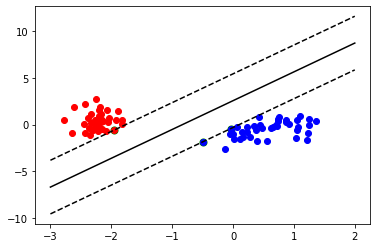

In [ ]:




url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# targets = ['Iris-setosa', 'Iris-versicolor']
# colors = ['r', 'g']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['target'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
from sklearn.datasets import load_iris

def linear_kernel(x1, x2):
    return np.dot(x1, x2)


class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl

    def gen_lin_separable_data():
        # iris = load_iris()
        # X = iris.data[:,:]  
        # y = iris.target
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
        # load dataset into Pandas DataFrame
        df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


        features = ['sepal length', 'sepal width', 'petal length', 'petal width']
        # Separating out the features
        x = df.loc[:, features].values
        # Separating out the target
        y = df.loc[:,['target']].values
        # Standardizing the features
        x = StandardScaler().fit_transform(x)


        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(x)
        principalDf = pd.DataFrame(data = principalComponents
                     , columns = ['principal component 1', 'principal component 2'])

        finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
        X1 = principalDf[:50]
        X2 = principalDf[50:100]
        y1 = np.ones(len(X1))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2


    def split_train(X1, y1, X2, y2):
        X1_train = X1[:40]
        y1_train = y1[:40]
        X2_train = X2[:40]
        y2_train = y2[:40]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train

    def split_test(X1, y1, X2, y2):
        X1_test = X1[40:]
        y1_test = y1[40:]
        X2_test = X2[40:]
        y2_test = y2[40:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test
    
    
    def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]
        
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=50, c="g")

        # w.x + b = 0
        tmp1 = -3
        tmp2 = 2
        a0 = tmp1; a1 = f(a0, clf.w, clf.b)
        b0 = tmp2; b1 = f(b0, clf.w, clf.b)
        pl.plot([a0,b0], [a1,b1], "k")

        # w.x + b = 1
        a0 = tmp1; a1 = f(a0, clf.w, clf.b, 1)
        b0 = tmp2; b1 = f(b0, clf.w, clf.b, 1)
        pl.plot([a0,b0], [a1,b1], "k--")

        # w.x + b = -1
        a0 = tmp1; a1 = f(a0, clf.w, clf.b, -1)
        b0 = tmp2; b1 = f(b0, clf.w, clf.b, -1)
        pl.plot([a0,b0], [a1,b1], "k--")

        pl.axis("tight")
        pl.figure(1)
        pl.show()

    def test_linear():
        
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM()
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))
        plot_margin(X_train[y_train==1], X_train[y_train==-1], clf)
        
    test_linear()